# Optimizing Dollar-Cost Averaging (DCA) for BEM Stock: Unveiling the Best Day to Invest

### 1. Average price group-by Month

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('ราคาย้อนหลัง หุ้น BEM.csv')  # Update 'your_dataset_path.csv' with your file path


In [47]:
df.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,1/10/2024,8.10,8.00,8.10,7.90,16.41M,1.89%
1,1/9/2024,7.95,8.05,8.05,7.95,6.27M,-0.63%
2,1/8/2024,8.00,8.00,8.05,7.95,19.62M,-0.62%
3,1/5/2024,8.05,8.15,8.20,8.05,29.78M,-1.23%
4,1/4/2024,8.15,8.00,8.15,8.00,20.93M,1.24%


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   วันเดือนปี  968 non-null    object 
 1   ล่าสุด      968 non-null    float64
 2   ราคาเปิด    968 non-null    float64
 3   สูงสุด      968 non-null    float64
 4   ต่ำสุด      968 non-null    float64
 5   ปริมาณ      968 non-null    object 
 6   % เปลี่ยน   968 non-null    object 
dtypes: float64(4), object(3)
memory usage: 53.1+ KB


In [49]:
# Extract day of the month from the 'วันเดือนปี' column
df['Day_of_Month'] = pd.to_datetime(df['วันเดือนปี']).dt.day

# Calculate average 'ล่าสุด' (Close Price) for each day of the month
daily_avg_prices = df.groupby('Day_of_Month')['ล่าสุด'].mean()


In [50]:
# Identify the day(s) with the lowest average 'ล่าสุด' (Close Price)
lowest_avg_price_day = daily_avg_prices.idxmin()
lowest_avg_price_value = daily_avg_prices.min()
print(f"The lowest average Close Price occurs on Day {lowest_avg_price_day} with an average price of {lowest_avg_price_value:.2f}")


The lowest average Close Price occurs on Day 2 with an average price of 8.66


In [51]:
# Calculate average 'ล่าสุด' (Close Price) for each day of the month
daily_avg_prices = df.groupby('Day_of_Month')['ล่าสุด'].mean()


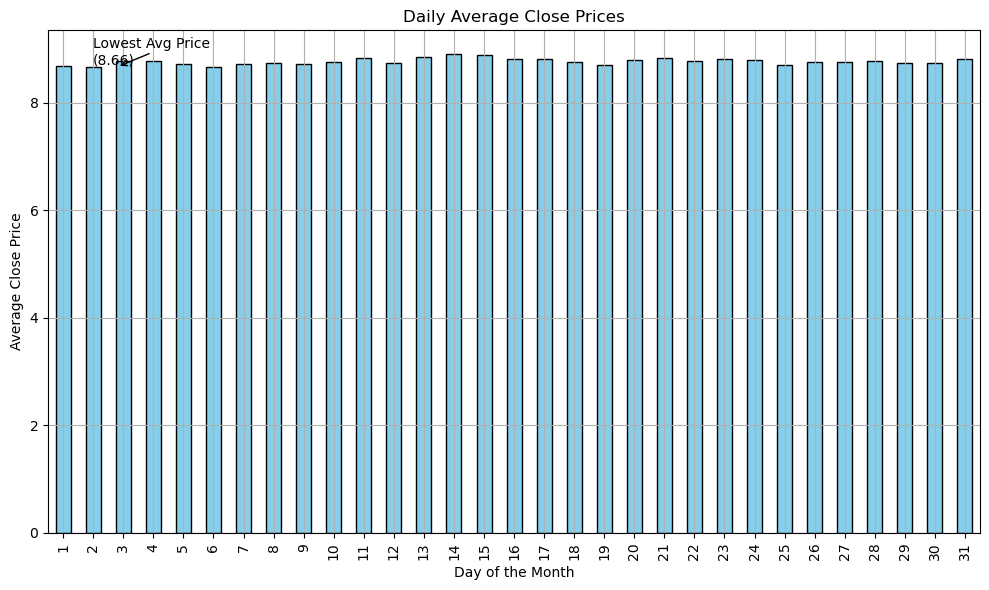

In [52]:
# Create a bar plot for daily average close prices
plt.figure(figsize=(10, 6))
daily_avg_prices.plot(kind='bar', color='skyblue', edgecolor='black')

# Highlight the day with the lowest average close price
lowest_avg_price_day = daily_avg_prices.idxmin()
lowest_avg_price_value = daily_avg_prices.min()
plt.annotate(f'Lowest Avg Price\n({lowest_avg_price_value:.2f})', 
             xy=(lowest_avg_price_day - 0.2, lowest_avg_price_value + 0.01), 
             xytext=(lowest_avg_price_day - 1, lowest_avg_price_value + 0.05),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

# Set plot title and labels
plt.title('Daily Average Close Prices')
plt.xlabel('Day of the Month')
plt.ylabel('Average Close Price')

# Display the plot
plt.tight_layout()
plt.grid(True)
plt.show()


In [53]:
# Calculate average 'ล่าสุด' (Close Price) for each day of the month
daily_avg_prices = df.groupby('Day_of_Month')['ล่าสุด'].mean()

# Identify the day with the highest average close price
highest_avg_price_day = daily_avg_prices.idxmax()
highest_avg_price_value = daily_avg_prices.max()

print(f"The highest average Close Price occurs on Day {highest_avg_price_day} with an average price of {highest_avg_price_value:.2f}")


The highest average Close Price occurs on Day 14 with an average price of 8.90


### 2. Frequency Distribution the lowest price group-by Month

In [61]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('ราคาย้อนหลัง หุ้น BEM.csv')

# Convert the 'วันเดือนปี' column to datetime format
df['วันเดือนปี'] = pd.to_datetime(df['วันเดือนปี'], format="%m/%d/%Y", dayfirst=True)

# Extract day of the month and month
df['Day_of_Month'] = df['วันเดือนปี'].dt.day
df['Month'] = df['วันเดือนปี'].dt.to_period('M')

# Calculate the lowest price day score
lowest_price_days = df.groupby('Month').apply(lambda x: x.loc[x['ล่าสุด'].idxmin()]['Day_of_Month'])
score = lowest_price_days.value_counts().sort_values(ascending=False)

# Identify the optimal day with the highest score (most frequent lowest price day)
optimal_day = score.idxmax()
optimal_day_score = score.max()

print(f"The optimal day with the lowest price score of {optimal_day_score} occurs on Day {optimal_day}.")


The optimal day with the lowest price score of 7 occurs on Day 30.


In [62]:
# Group by month and find the day with the lowest closing price
lowest_price_days = df.groupby('Month').apply(lambda x: x.loc[x['ล่าสุด'].idxmin()]['Day_of_Month'])

# Calculate frequency distribution of days with lowest prices
frequency_distribution = lowest_price_days.value_counts().sort_values(ascending=False)

print("Frequency distribution of days with the lowest prices:")
print(frequency_distribution)

Frequency distribution of days with the lowest prices:
30    7
28    5
29    4
2     4
17    4
31    3
9     3
27    3
7     2
1     2
10    2
20    2
22    1
5     1
4     1
8     1
16    1
6     1
3     1
25    1
Name: count, dtype: int64


### 3. Scoring Selection: score top 5 of Frequency Distribution and find the highest one

citeria: top 1: 5score , top 2: 4score , top 3: 3score , top 4: 2score , top 5: 1score

In [70]:

# Extract day of the month and month
df['Day_of_Month'] = df['วันเดือนปี'].dt.day
df['Month'] = df['วันเดือนปี'].dt.to_period('M')

# Find the most frequent lowest price day in each month
most_frequent_lowest_days = (
    df.groupby('Month')['Day_of_Month']
    .apply(lambda x: x.value_counts().idxmax())
    .reset_index(name='Day_of_Month')
)

# Calculate total score for each day based on frequency of being the lowest price day
total_score = most_frequent_lowest_days['Day_of_Month'].value_counts().sort_index()

# Identify the best day(s) with the highest total score
best_days = total_score.idxmax()
best_days_score = total_score.max()

print(f"The best day(s) for DCA with the highest total score of {best_days_score} is/are: {best_days}")


The best day(s) for DCA with the highest total score of 18 is/are: 30


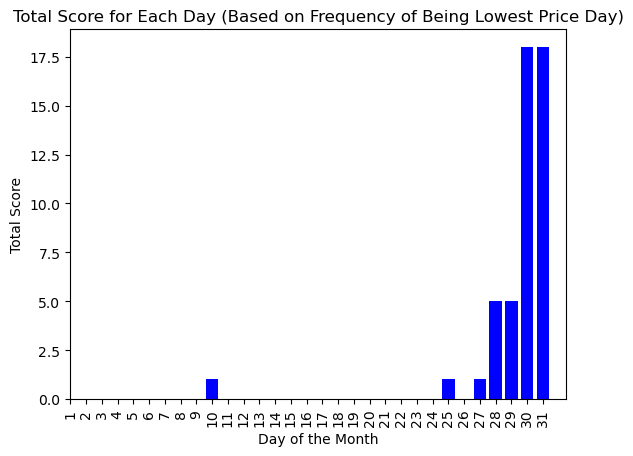

In [71]:

# Plot the bar chart with adjusted width and x-axis ticks for days 1 to 31
plt.bar(total_score.index, total_score.values, color='blue', width=0.8)
plt.xlabel('Day of the Month')
plt.ylabel('Total Score')
plt.title('Total Score for Each Day (Based on Frequency of Being Lowest Price Day)')

# Set the x-axis ticks to days 1 to 31
plt.xticks(range(1, 32), rotation='vertical')

plt.show()

# Conclusion 

we choose day 30 because day 30 has highest frequency of lowest price in each month which means their the highest chance that if we buy BEM on day 30, it's will be the lowest price. The result of scoring method was supporting day 30 and show that we can buy on the 31st instead of the 30th.